In [2]:
%matplotlib inline 
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina' # I use a HiDPI screen

In [14]:
import numpy as np
import itertools
from subprocess import call
import matplotlib.pyplot as plt
import fishchips.camb

In [15]:
# camb_dir = "/home/zequnl/Installs/franyancr-ethos_camb-3f4c02cd3668/"
# camb_exec = "ethos_camb"

camb_dir = "/home/zequnl/Installs/CAMB/"
camb_exec = "camb"



pars = np.array( ['ombh2', 'omch2', 'hubble',  'scalar_amp(1)', 
                  'scalar_spectral_index(1)', 're_optical_depth'])
centers = np.array([0.022370,  0.120,  67.36,  2.1e-9, 0.9649, 0.0544])
steps = np.array([0.0001,     0.001,    1.00,   0.01e-9, 0.005, 0.02])


obs = fishchips.camb.CAMB_Observables(pars, fiducial=centers, 
                                      left=centers-steps, right=centers+steps,
                                      output_root = "spectra/new_ethos_a4",
                                     CAMB_directory=camb_dir,
                                     CAMB_executable=camb_exec)


In [16]:
CAMB_template = {
    'CMB_outputscale':1
                }

# generate the fiducial cosmology
obs.compute_cosmo(key='fiducial', CAMB_dict=CAMB_template, debug=True)

Calling CAMB.
b'Reion redshift       =   7.689
Om_b h^2             =  0.022370
Om_c h^2             =  0.120000
Om_nu h^2            =  0.000644
Om_Lambda            =  0.684809
Om_K                 =  0.000000
Om_m (1-Om_K-Om_L)   =  0.315191
100 theta (CosmoMC)  =  1.040937
N_eff (total)        =  3.046000
 1 nu, g= 1.0153 m_nu*c^2/k_B/T_nu0=    355.92 (m_nu=  0.060 eV)
Reion opt depth      =  0.0544
Age of universe/GYr  =  13.797
zstar                =  1089.92
r_s(zstar)/Mpc       =  144.43
100*theta            =  1.041121
DA(zstar)/Gpc        =  13.87270
zdrag                =  1059.93
r_s(zdrag)/Mpc       =  147.09
k_D(zstar) Mpc       =  0.1409
100*theta_D          =  0.160763
z_EQ (if v_nu=1)     =  3402.21
k_EQ Mpc (if v_nu=1) =  0.010384
100*theta_EQ         =  0.813311
100*theta_rs_EQ      =  0.449390
tau_recomb/Mpc       =  280.62  tau_now/Mpc =  14153.2
at z =  0.000 sigma8 (all matter) =  0.8112
at z =  0.000 sigma8^2_vd/sigma8  =  0.4284
'
b'Note: The following floating

In [21]:
# generate an observables dictionary, looping over parameters
for par, par_left, par_right in zip(obs.parameters, obs.left, obs.right):
    classy_left = CAMB_template.copy()
    classy_left[par] = par_left
    classy_right = CAMB_template.copy()
    classy_right[par] = par_right
    # pass the dictionaries full of configurations to get computed
    obs.compute_cosmo(key=par + '_left', CAMB_dict=classy_left)
    obs.compute_cosmo(key=par + '_right', CAMB_dict=classy_right)

generating new axis
['$\\mathrm{ombh2}$', '$\\mathrm{omch2}$', '$\\mathrm{hubble}$', '$\\mathrm{scalar\\_amp(1)}$', '$\\mathrm{scalar\\_spectral\\_index(1)}$', '$\\mathrm{re\\_optical\\_depth}$']


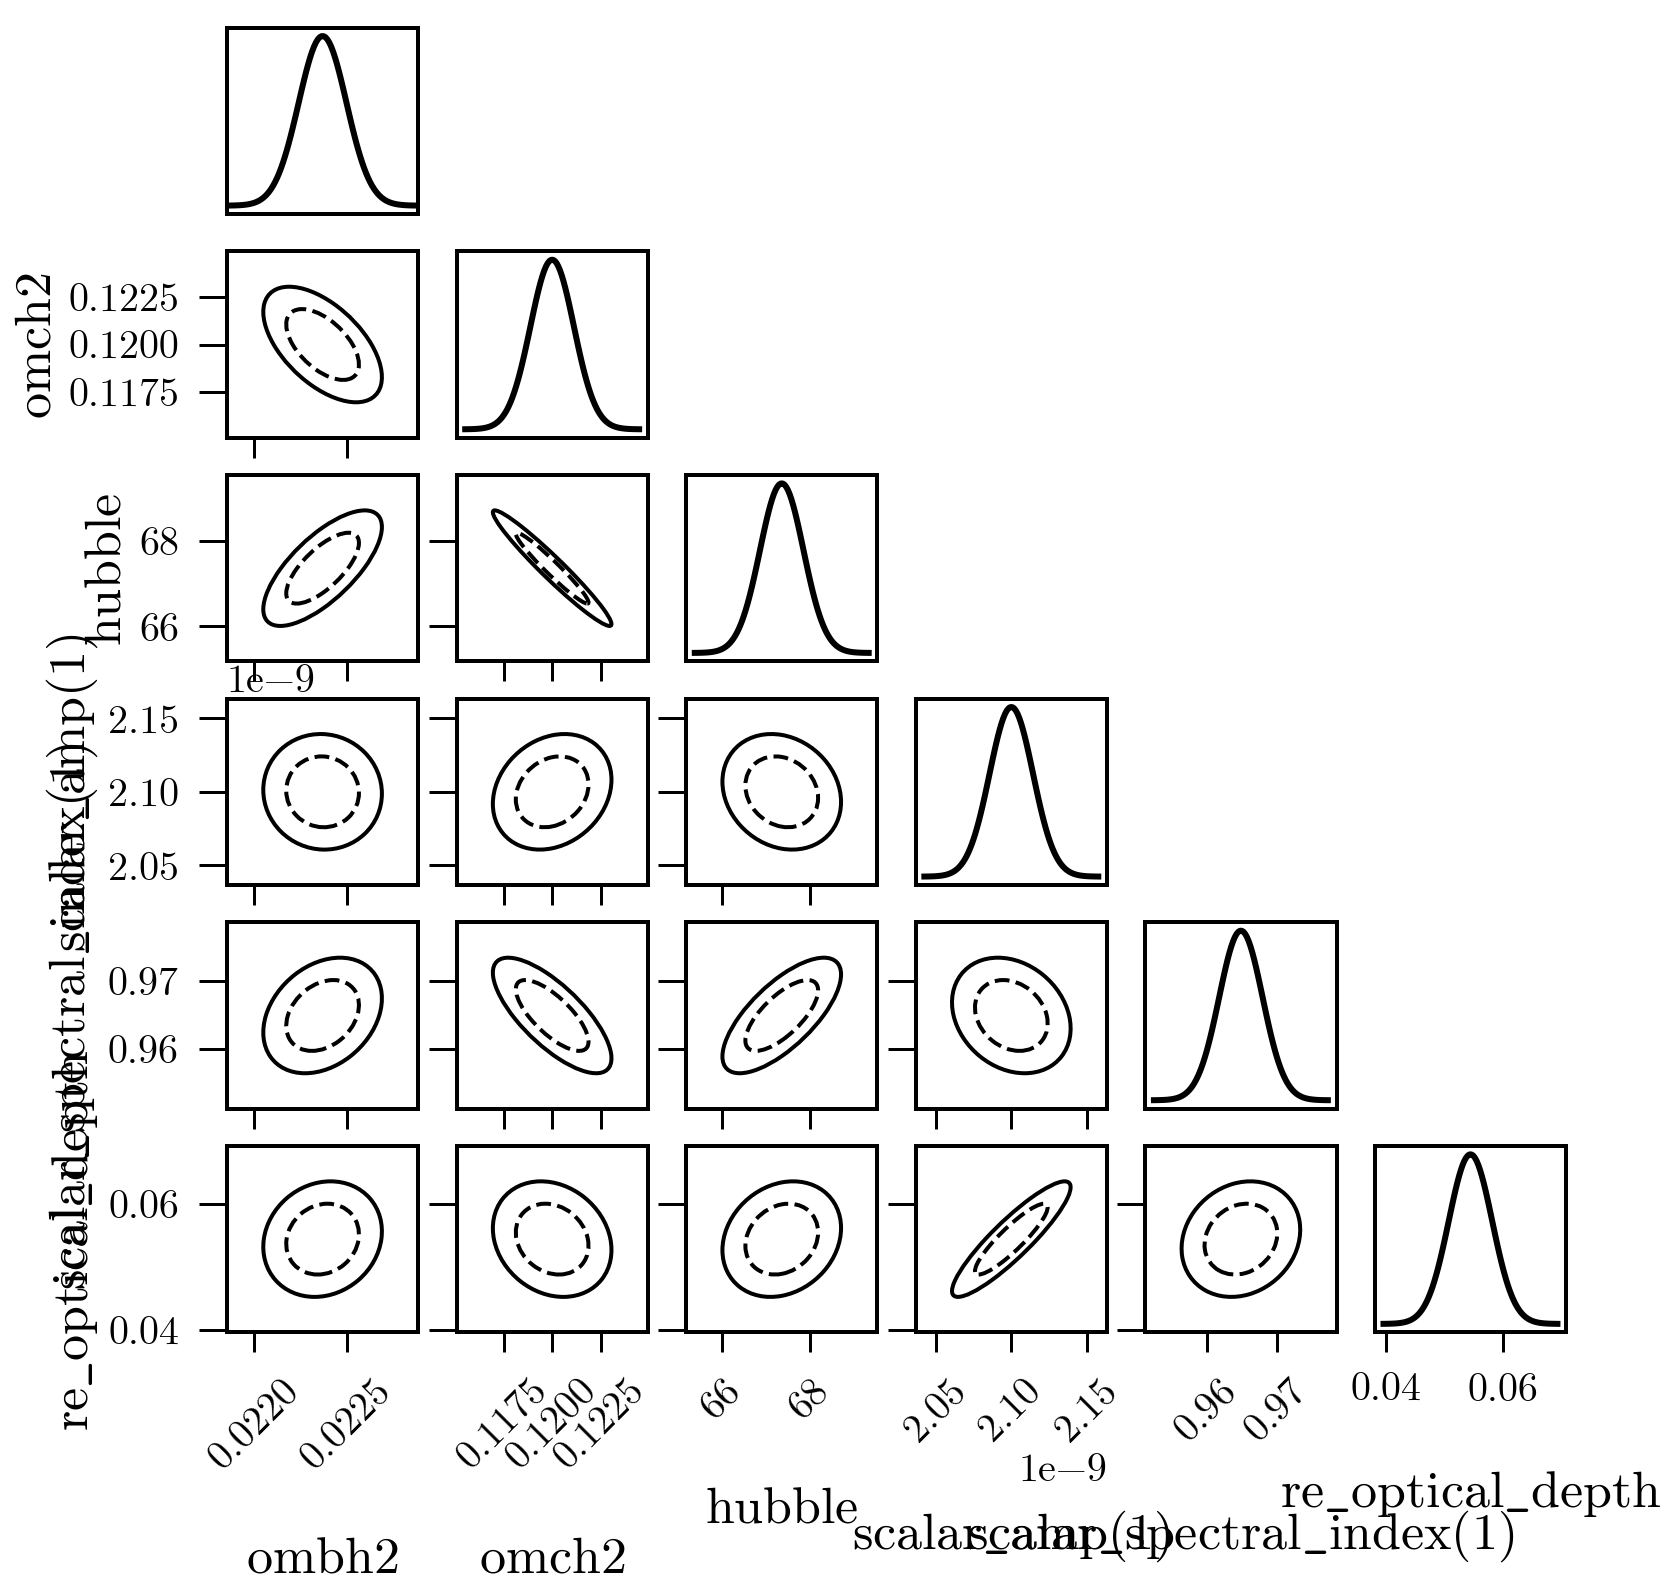

In [22]:
example_Planck = CMB_Primary(
    theta_fwhm=[7.], sigma_T=[33.], sigma_P=[56.],
    f_sky=0.65, l_min=2, l_max=2500)
fisher = example_Planck.get_fisher(obs)
cov = np.linalg.inv(fisher)
fishchips.util.plot_triangle(obs, cov);

In [24]:
from fishchips.experiments import CMB_Primary
from fishchips.cosmo import Observables
import fishchips.util

from classy import Class  # CLASS python wrapper
import numpy as np
import matplotlib.pyplot as plt

# create an Observables object to store information for derivatives

pars = np.array( ['omega_b', 'omega_cdm', 'h',  'A_s', 'n_s', 'tau_reio'])
centers = np.array([0.022370,  0.120,  0.6736,  2.1e-9, 0.9649, 0.0544])
steps = np.array([0.0001,     0.001,    0.01,   0.01e-9, 0.005, 0.02])

obs_CLASS = Observables(parameters=pars,
                  fiducial=centers,
                  left=centers-steps,
                  right=centers+steps)

# generate a template CLASS python wrapper configuration
classy_template = {'output': 'tCl pCl lCl',
                   'l_max_scalars': 2500,
                   'lensing': 'yes',
                   'N_ur': 2.0328,
                   'N_ncdm' : 1 ,
                   'm_ncdm' : 0.06,
                   'T_ncdm' : 0.71611}

# add in the fiducial values too
classy_template.update(dict(zip(obs_CLASS.parameters, obs_CLASS.fiducial)))

# generate the fiducial cosmology
obs_CLASS.compute_cosmo(key='fiducial', classy_dict=classy_template)

In [25]:
np.hstack( [[0,1,2], [3,4]])

array([0, 1, 2, 3, 4])

In [26]:
cl = obs.cosmos['fiducial'].lensed_cl(2500)
cl_CLASS = obs_CLASS.cosmos['fiducial'].lensed_cl(2500)

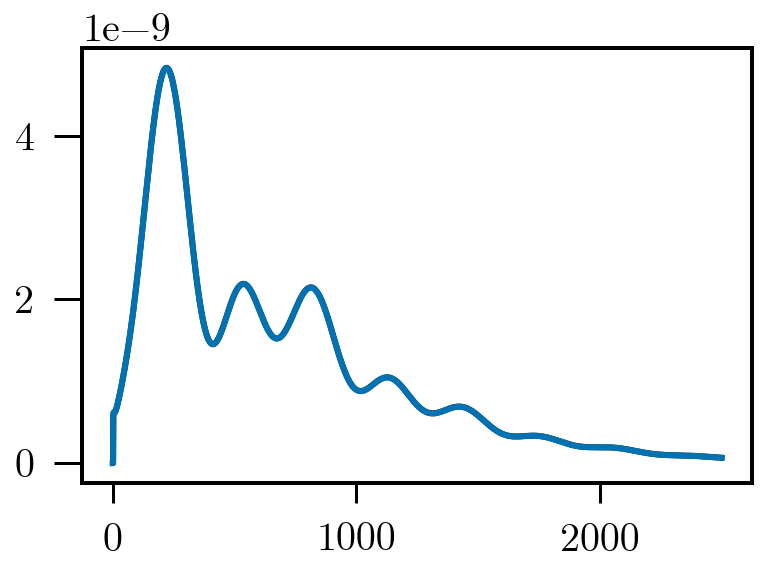

In [27]:
plt.plot( cl['tt'] * cl['ell']**2 )
plt.plot( cl_CLASS['tt'] * cl_CLASS['ell']**2 )

/home/zequnl/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


Text(0,0.5,'$C_{\\ell, CAMB}^{TT} / C_{\\ell, CLASS}^{TT}$')

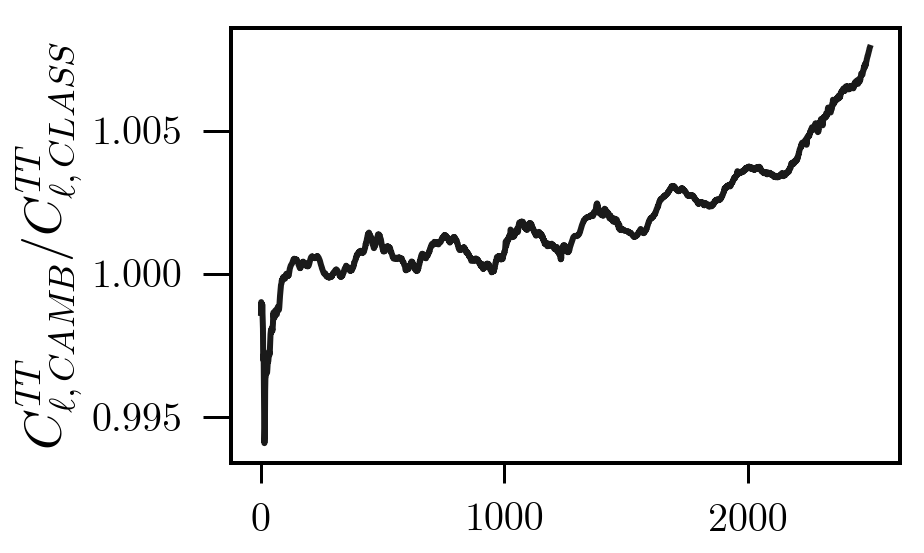

In [32]:
plt.plot( cl['tt'] / cl_CLASS['tt'], label="ratio" )
plt.ylabel("$C_{\ell, CAMB}^{TT} / C_{\ell, CLASS}^{TT}$")

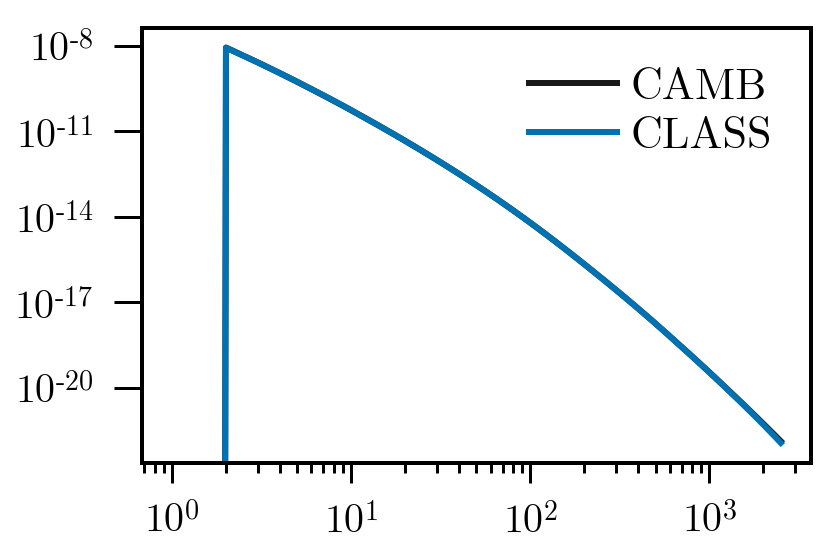

In [29]:
plt.plot( cl['pp'], label="CAMB"  )
plt.plot( cl_CLASS['pp'], label="CLASS")
plt.yscale("log")
plt.xscale("log")
plt.legend()

/home/zequnl/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


Text(0,0.5,'$C_{\\ell, CAMB}^{\\kappa\\kappa} / C_{\\ell, CLASS}^{\\kappa\\kappa}$')

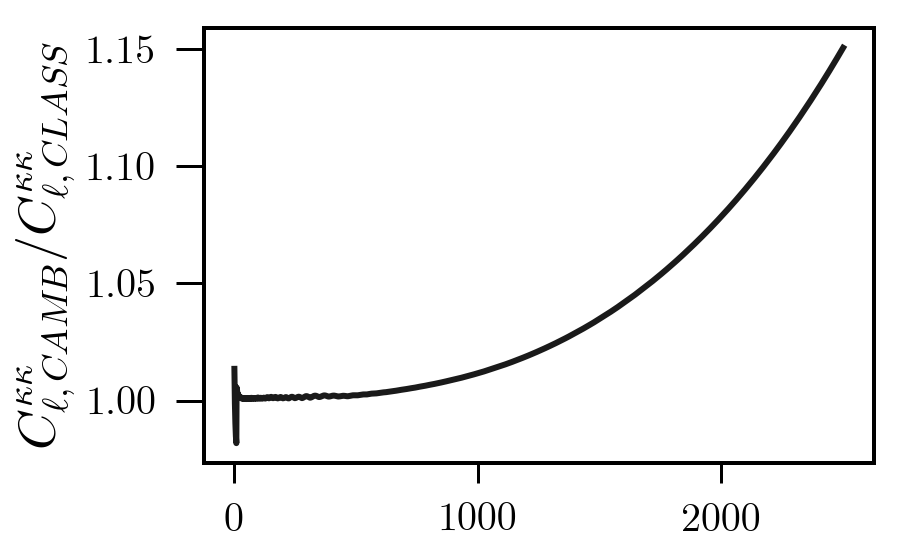

In [33]:
plt.plot( cl['pp'] / cl_CLASS['pp']  )
plt.ylabel("$C_{\ell, CAMB}^{\kappa\kappa} / C_{\ell, CLASS}^{\kappa\kappa}$")